# Evaluating Model Fit, and using sklearn for Logistic Regression

In [2]:
from __future__ import division, print_function

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import scale

pd.options.display.max_columns = 50

In [3]:
# Wisconsin breast cancer data

dimensions = ['mean', 'se', 'worst']
attributes = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
              'concavity', 'concave_points', 'symmetry', 'fractal_dimension']

attribute_names = ['{}-{}'.format(x, y) for x in attributes for y in dimensions]

cell_data_filepath = 'https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv'
col_names = ['id', 'diagnosis'] + attribute_names
cell_df = pd.read_csv(cell_data_filepath, header=None, names=col_names)
cell_df.head()

,id,diagnosis,radius-mean,radius-se,radius-worst,texture-mean,texture-se,texture-worst,perimeter-mean,perimeter-se,perimeter-worst,area-mean,area-se,area-worst,smoothness-mean,smoothness-se,smoothness-worst,compactness-mean,compactness-se,compactness-worst,concavity-mean,concavity-se,concavity-worst,concave_points-mean,concave_points-se,concave_points-worst,symmetry-mean,symmetry-se,symmetry-worst,fractal_dimension-mean,fractal_dimension-se,fractal_dimension-worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# to make some steps a bit more straightforward, we will change the two level diagnosis to a zero and one
mapping={"M":1, "B":0}
cell_df["diagnosis_2"]=cell_df["diagnosis"].map(mapping)

In [5]:
# pull features
features_df = cell_df[attribute_names]

# pull target and view split
target_df = cell_df["diagnosis_2"]
target_df.value_counts()

0    357
1    212
Name: diagnosis_2, dtype: int64

Split into 66% training set and 33% testing set

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(features_df, target_df, test_size=0.33, random_state=5)

Fit the logistic regression on the training data

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

# note: you can return probabilities with
Y_probabilities=logreg.predict_proba(X_test)
# and the threshold is 0.5 for the predict method

Look at the confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix
# the input format is almost always (test, predict), but always check with documentation!
conmat = np.array(confusion_matrix(Y_test, Y_pred))
confusion = pd.DataFrame(conmat, index=['is_benign', 'is_malignant'],columns=['predicted_benign', 'predicted_malignant'])
confusion

,predicted_benign,predicted_malignant
is_benign,121,1
is_malignant,2,64


Calculate true positives, false positives, true negatives, and false negatives from the confusion matrix

In [9]:
TP = confusion.loc['is_malignant', 'predicted_malignant']
FP = confusion.loc['is_benign', 'predicted_malignant']
TN = confusion.loc['is_benign', 'predicted_benign']
FN = confusion.loc['is_malignant', 'predicted_benign']
print(zip(['True Positives','False Positives','True Negatives','False Negatives'],[TP, FP, TN, FN]))

[('True Positives', 64), ('False Positives', 1), ('True Negatives', 121), ('False Negatives', 2)]


## Summary of evaluation of fit terms

- #### Precision = True Positives / (True Positives + False Positives)
- #### Recall or Sensitivity = True Positives / (True Positives + False Negatives)  
- #### F1 Score = 2 x (Precision x Recall) / (Precision + Recall)      
- #### Specificity = True Negative / (True Negative + False Positive)   
- #### Accuracy = (True Positive + True Negative) / (True Positive + True Negative + False Positive + False Negative)

Calculate the accuracy with the accuracy_score() function from sklearn

In [10]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_pred)
print(acc)

0.984042553191


Show that the accuracy is equivalent to: True Positives + True Negatives / Total

In [11]:
print((TP + TN) / float(len(Y_test)))

0.984042553191


Create the classification report with the classification_report() function

In [12]:
from sklearn.metrics import classification_report

cls_rep = classification_report(Y_test, Y_pred)
print(cls_rep)

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       122
          1       0.98      0.97      0.98        66

avg / total       0.98      0.98      0.98       188



Show that the precision (for 1 vs 0) is equivalent to: True Positives / (True Positives + False Positives)

In [13]:
# Benign vs. malignant
print(float(TN) / (TN + FN))

# Malignant vs. benign
print(float(TP) / (TP + FP))

0.983739837398
0.984615384615


Show that the recall (for 1 vs 0) is equivalent to: True Positives / (True Positives + False Negatives)

In [14]:
# Benign vs. malignant
print(float(TN) / (TN + FP))

# Malignant vs. benign
print(float(TP) / (TP + FN))

0.991803278689
0.969696969697


Show that the F1-score is equivalent to: 2 x (Precision x Recall) / (Precision + Recall)

In [15]:
# Benign vs. malignant
neg_precision = float(TN) / (TN + FN)
neg_recall = float(TN) / (TN + FP)
print(2 * (neg_precision * neg_recall) / (neg_precision + neg_recall))

# Malignant vs. benign
pos_precision = float(TP) / (TP + FP)
pos_recall = float(TP) / (TP + FN)
print(2 * (pos_precision * pos_recall) / (pos_precision + pos_recall))

0.987755102041
0.977099236641


## ROC curve (Receiver Operating Characteristic)

In [16]:
# Get the predicted probability vector
Y_pp = pd.DataFrame(logreg.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])
Y_pp['pred_class'] = Y_pred
print(Y_pp.iloc[0:10])

   class_0_pp  class_1_pp  pred_class
0    0.000001    0.999999           1
1    0.984899    0.015101           0
2    0.993299    0.006701           0
3    0.975214    0.024786           0
4    0.909001    0.090999           0
5    0.000000    1.000000           1
6    0.934055    0.065945           0
7    0.997911    0.002089           0
8    0.831454    0.168546           0
9    0.992814    0.007186           0


In [17]:
conmat = np.array(confusion_matrix(Y_test, Y_pp["pred_class"]))
confusion = pd.DataFrame(conmat, index=['is_benign', 'is_malignant'],columns=['predicted_benign', 'predicted_malignant'])
confusion

,predicted_benign,predicted_malignant
is_benign,121,1
is_malignant,2,64


In [18]:
# If you wanted to tune so that you, say, had a much lower likelihood to predict benign (so more patients
# had to be checked with eg a biopsy, but at least you don't miss any malignant tumours) then one way
# would be to change this threshold. This is a little bit of a 'hack',  but one
# that can be good to explore your model and its behaviour and test its responses.

Y_pp['pred_class_lower_threshold'] = [1 if x >= 0.1 else 0 for x in Y_pp["class_1_pp"].values]
print(Y_pp.iloc[0:10])

   class_0_pp  class_1_pp  pred_class  pred_class_lower_threshold
0    0.000001    0.999999           1                           1
1    0.984899    0.015101           0                           0
2    0.993299    0.006701           0                           0
3    0.975214    0.024786           0                           0
4    0.909001    0.090999           0                           0
5    0.000000    1.000000           1                           1
6    0.934055    0.065945           0                           0
7    0.997911    0.002089           0                           0
8    0.831454    0.168546           0                           1
9    0.992814    0.007186           0                           0


In [19]:
conmat_10 = np.array(confusion_matrix(Y_test, Y_pp["pred_class_lower_threshold"]))
confusion_10 = pd.DataFrame(conmat_10, index=['is_benign', 'is_malignant'],columns=['predicted_benign', 'predicted_malignant'])
confusion_10

,predicted_benign,predicted_malignant
is_benign,100,22
is_malignant,1,65


So one that was predicted benign has been moved to predicted malignant, but we get more of those malignant
predictions wrong. How can we visualise this?

The ROC curve compares the true positive rate against the false positive rate. It is unaffected by the distribution 
of class labels since it is only comparing the correct vs. incorrect label assignments for one class.

To plot this we will use the roc_curve() and auc() functions from sklearn. We will also use the decision_function() 
method of the logistic regression, which essentially gives us the confidence of each observation being in one class or 
another.

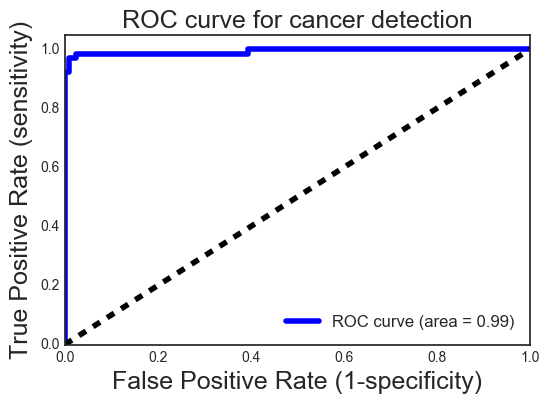

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = logreg.decision_function(X_test)

# For class malignant, find the area under the curve
FPR, TPR, THR = roc_curve(Y_test, Y_score)
ROC_AUC = auc(FPR, TPR)

# Plot of a ROC curve for class 1 (has_cancer)
#plt.figure(figsize=[11,9])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-specificity)', fontsize=18)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=18)
plt.title('ROC curve for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

Ok, so right now you're wondering what this is. This is a ROC curve, and don't
worry about the acronym it makes not a lot of sense. It's to do with how it was originally developed during WWII when testing RADAR (RAdio Detection And Ranging... you see, rubbish acronyms) and trying to determine if they could tell the difference between planes
and flocks of birds (that's what you call a false positive!). So they unhelpfully called it Receiver Operating Characteristic.

The main takeaway is that the bigger
the area under the curve (measured from 0 to 1) the better the classifier. If the area was 0.5 the classifier would follow the 
dotted diagonal and be no better than guessing. So we want the line to hug the top left hand corner - so
this one looks good!

But how did we calculate this? What was that code in the cell above? The main thing to understand is that we vary the threshold across a range of possible values to produce this curve, and then visualise what the true positive and false positive rates would be under these thresholds (however the threshold is defined differently from our hack previously, but we don't need to worry too much about the details).

The roc_curve function from sklearn returns three arrays:
first is the true positive rate, second is the false positive rate, and third is the thresholds on the
decision function (these are actually defined differently from the thresholds we were talking about in being 0-1 on probability, but same effect).

We will not go much more into the mechanics of the ROC curve but to say that each point is a different
model essentially with different decision boundaries, so generally we would select the one with the most
optimal characteristics for our situation (i.e. balancing false positives and false negatives), which generally
means the one closest to the top left. Since this model is so good, this is a bit difficult to see so we will look at another.

The ROC curve can a pretty good one to show non-technical people since you can explain that a classifier which follows the diagonal line is just chance, so anything above that is good - this is nice and visual and clear to see.

# Another Example Walkthrough

In [5]:
# let's try a different data set, Sacramento house sales
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
sac = pd.read_csv('Sacramentorealestatetransactions.csv')
sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [28]:
# Create a binary variable where 1 indicates a house sold for over 200,000 and 0 indicates a house 
# sold for equal to or less than 200,000. Subset the data to just contain the number of beds, 
# baths, the sq ft, and the over 200k indicator variable.
sac['over_200k'] = sac['price'].map(lambda x: 0 if x > 200000 else 1)
sac = sac[['beds','baths','sq__ft','over_200k']]
sac=sac.dropna()
sac.head()

,beds,baths,sq__ft,over_200k
0,2,1,836,1
1,3,1,1167,1
2,2,1,796,1
3,2,1,852,1
4,2,1,797,1


In [39]:
# we perform a train test split and ask sklearn to stratify over the over_200k label so they are distributed
# in the same way as in the total dataset
X_train, X_test, Y_train, Y_test = train_test_split(sac[['beds','baths','sq__ft']].values,
            sac['over_200k'].values, test_size=0.33, stratify=sac['over_200k'].values, random_state=77)

In [40]:
logreg = LogisticRegression(random_state=77)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [41]:
conmat = np.array(confusion_matrix(Y_test, Y_pred))
confusion = pd.DataFrame(conmat, index=['over_200k', 'under_200k'],
                         columns=['predicted_over_200k','predicted_under_200k'])
confusion

,predicted_over_200k,predicted_under_200k
over_200k,127,51
under_200k,79,69


In [44]:
# Accuracy tells us the percent of houses selling for over and under 200k correctly predicted
print(accuracy_score(Y_test, Y_pred))

# Precision tells us how well the classifier avoided misclassifying the over 200k houses
print(precision_score(Y_test, Y_pred))

# Recall tells us how well the classifier correctly identified houses as selling for over 200k
print(recall_score(Y_test, Y_pred))

0.601226993865
0.575
0.466216216216


The difference between precision and recall can be tricky to interpret. The intuition here is
that precision is a measure of the QUALITY of results: of the houses labeled as over 200k,
how many of those were correct?

Recall, on the other hand, is a measure of the COMPLETENESS of results: of all the houses
that sold for over 200k, how many were identified by the classifier?

On the flip side, you can have a high precision but identify very few of the total 200k houses.
Likewise, you can have a high recall but also incorrectly identify many under 200k houses
as over 200k houses.

Say as a real estate agent, I prioritize minimizing false positives (predicting a house will sell for over 200k when it actually sells for under) because false positives make me lose money.
Change the decision threshold to lower the false positive rate and then print out the new confusion matrix. What is the downside to lowering the false positive rate?

In [45]:
Y_pp = pd.DataFrame(logreg.predict_proba(X_test), columns=['under_200k_pp','over_200k_pp'])

# change the threshold to predict over 200k to 0.7 - it is harder for the classifier to assign the over 200k label
Y_pp['over_200k_high_thresh'] = [1 if x >= 0.70 else 0 for x in Y_pp.over_200k_pp.values]

conmat_high = np.array(confusion_matrix(Y_test, Y_pp.over_200k_high_thresh.values, labels=[1,0]))
confusion_high = pd.DataFrame(conmat_high, index=['over_200k', 'under_200k'],
                              columns=['predicted_over_200k','predicted_under_200k'])
confusion_high

,predicted_over_200k,predicted_under_200k
over_200k,15,133
under_200k,18,160


In [53]:
# generic curve plotting function
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    #plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for house price > 200,000', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate (1-specificity)', 'True Positive Rate (sensitivity)', 'ROC')

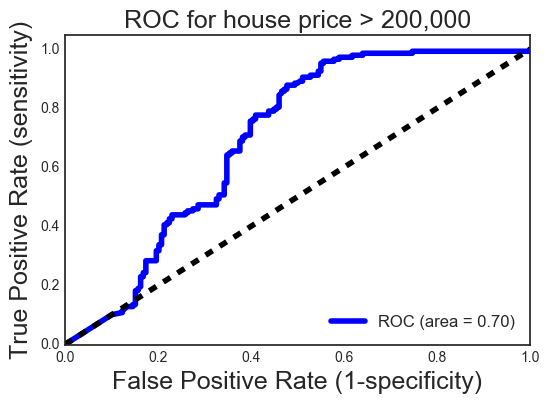

In [54]:
Y_score = logreg.decision_function(X_test)
plot_roc(Y_test, Y_score)

In [ ]:
# This is a bit more in line with the kind of classifiers you might see as part of your work - it's pretty good, but
# not quite as amazing as the tumour one.